In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "C:\\Users\\stlki\\OneDrive\\Desktop\\Homework\\matplotlib-challenge\\Mouse_metadata.csv"
study_results_path = "C:\\Users\\stlki\\OneDrive\\Desktop\\Homework\\matplotlib-challenge\\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
single_df = pd.merge(study_results, mouse_metadata, how = "inner", on = "Mouse ID")

# Display the data table for preview
single_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
#Checking the number of mice
print(len(single_df))

1893


In [3]:
#Get the duplicate mice by ID number for Mouse ID and Timepoint.
mouse_id = single_df.loc[single_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
mouse_id

array(['g989'], dtype=object)

In [4]:
#Create a new data frame by dropping duplicate mouse.
clean_df = single_df[single_df['Mouse ID'].isin(mouse_id)==False]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [5]:
#Check the number of mice in cleaned data frame.
print(len(clean_df))

1880


In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_volumes = pd.DataFrame(single_df[["Mouse ID", "Tumor Volume (mm3)", "Drug Regimen"]])
tumor_volumes

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumor_volume = tumor_volumes.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume = tumor_volumes.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_variance = tumor_volumes.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_volume_std_dev = tumor_volumes.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_volume_std_err = tumor_volumes.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume,
                                   "Median Tumor Volume": median_tumor_volume,
                                   "Tumor Volume Variance": tumor_volume_variance,
                                   "Tumor Volume Std. Dev.": tumor_volume_std_dev,
                                   "Tumor Volume Std. Err.": tumor_volume_std_err})
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


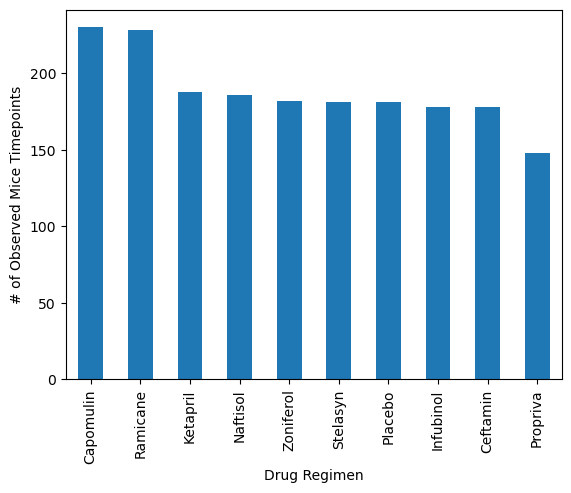

In [7]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = clean_df["Drug Regimen"].value_counts()
counts.plot(kind = "bar")
plt.ylabel("# of Observed Mice Timepoints")
plt.show()

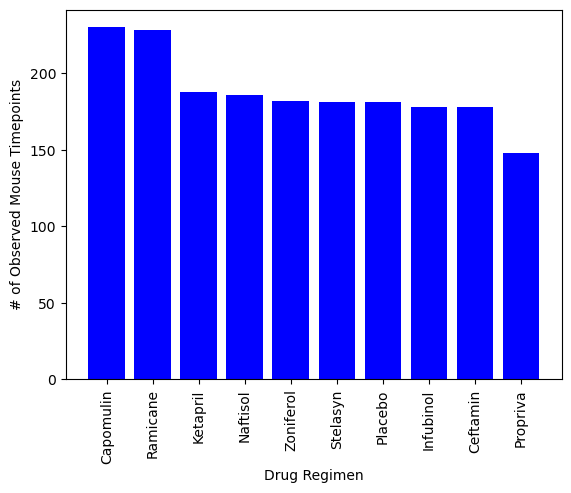

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(counts.index.values, counts.values, color = "blue")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = 90)
plt.show()

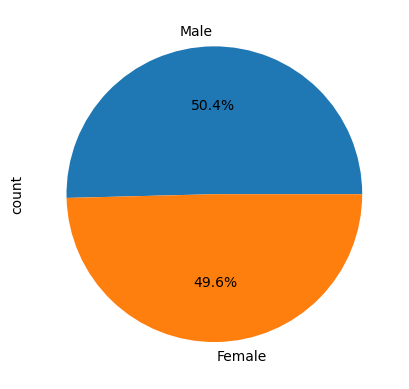

In [9]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
pie_chart = clean_df.loc[:, ["Mouse ID", "Sex"]].drop_duplicates()
counts = pie_chart.Sex.value_counts()
counts.plot(kind = "pie", autopct = "%1.1f%%")

# Make the pie chart
plt.show()

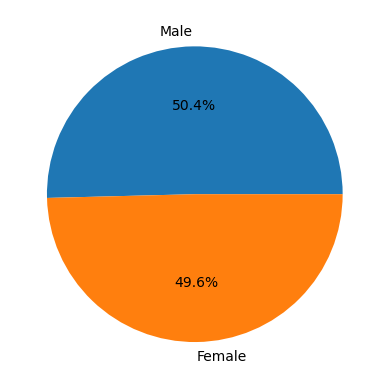

In [10]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
plt.pie(counts.values, labels = counts.index.values, autopct = "%1.1f%%")

# Make the pie chart
plt.show()

In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumor = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
final_tumor = final_tumor.reset_index()
final_tumor

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = final_tumor.merge(clean_df, on = ["Mouse ID", "Timepoint"], how = "left")
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [12]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_df.loc[merged_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']

    # add subset
    tumor_vol_list.append(final_tumor_vol)

    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


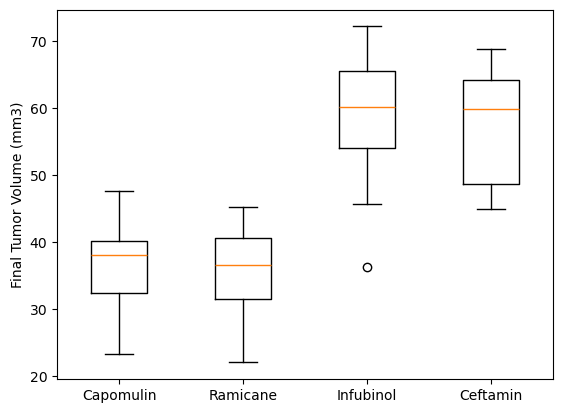

In [13]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_list)
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
ax1.set_ylabel("Final Tumor Volume (mm3)")
plt.show()

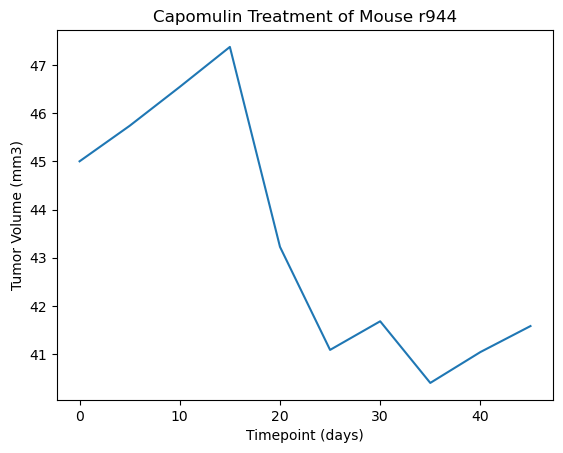

In [14]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_r944 = clean_df[clean_df["Mouse ID"] == "r944"]
mouse_r944_timepoint = mouse_r944["Timepoint"]
mouse_r944_tumor_volume = mouse_r944["Tumor Volume (mm3)"]
plt.plot(mouse_r944_timepoint, mouse_r944_tumor_volume)
plt.title("Capomulin Treatment of Mouse r944")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

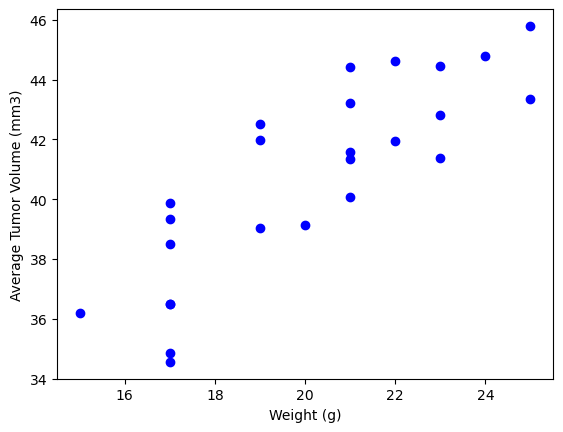

In [93]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_treatment = clean_df[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_treatment_mean_tumor_volume = capomulin_treatment.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
capomulin_merged = pd.merge(capomulin_treatment_mean_tumor_volume, capomulin_treatment, on = ["Mouse ID"], how = "left")
capomulin_merged = capomulin_merged[capomulin_merged["Timepoint"] == 0]
weight = capomulin_merged["Weight (g)"]
tumor_volume = capomulin_merged["Tumor Volume (mm3)_x"]
plt.scatter(weight, tumor_volume, facecolors = "blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

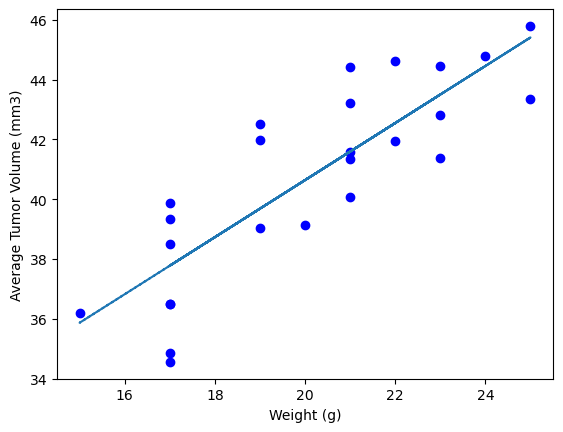

The correlation between mouse weight and average tumor volume is 0.84


In [103]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.scatter(weight, tumor_volume, facecolors = "blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
correlation = st.pearsonr(weight, tumor_volume)
(slope, intercept, r, p, std_err) = st.linregress(weight, tumor_volume)
line_fit = slope * weight + intercept
plt.plot(weight, line_fit, "--")
plt.show()
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")